# Data Cleaning and Data Analysis

In [81]:
import pandas as pd

#load the dataset
dataset = pd.read_csv('heart.csv')

In [82]:
dataset.head() #view first 5 rows of data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0.0,Normal,172.0,N,0.0,Up,0.0
1,49,F,NAP,160,180.0,0.0,Normal,156.0,N,1.0,Flat,1.0
2,37,M,ATA,130,283.0,0.0,ST,98.0,N,0.0,Up,0.0
3,48,F,ASY,138,214.0,0.0,Normal,108.0,Y,1.5,Flat,1.0
4,54,M,NAP,150,195.0,0.0,Normal,122.0,N,0.0,Up,0.0


In [83]:
# see data row and column
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html
dataset.shape

(918, 12)

In [84]:
# see data types of each column
dataset.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol       float64
FastingBS         float64
RestingECG         object
MaxHR             float64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease      float64
dtype: object

In [85]:
#statistical summary
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,916.000000,915.000000,917.000000,918.000000,903.000000
mean,53.510893,132.396514,198.852620,0.232787,136.767721,0.887364,0.555925
std,9.432617,18.514154,109.193372,0.422839,25.442922,1.066570,0.497138
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.750000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [86]:
# any null-values?
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     916 non-null    float64
 5   FastingBS       915 non-null    float64
 6   RestingECG      918 non-null    object 
 7   MaxHR           917 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    903 non-null    float64
dtypes: float64(5), int64(2), object(5)
memory usage: 86.2+ KB


In [87]:
# drop null values row
dataset.dropna(inplace=True)

#not dropping any columns since all are related data
# and show again the shape of dataset
dataset.shape

(897, 12)

In [88]:
# https://towardsdatascience.com/how-to-clean-your-data-in-python-8f178638b98d
# begin with checking unique values in each columns to ensure values are correct and clean

# Age: age of the patient [years]
dataset['Age'].unique()

array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71],
      dtype=int64)

In [89]:
# Sex: sex of the patient [M: Male, F: Female]
dataset['Sex'].unique()

array(['M', 'F'], dtype=object)

In [90]:
# ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
dataset['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [91]:
# RestingBP: resting blood pressure [mm Hg]
dataset['RestingBP'].unique()

array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
       145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
       200, 122,  98, 105, 133,  95,  80, 137, 185, 165, 126, 152, 116,
         0, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123, 102,
        96, 143, 172, 156, 114, 127, 101, 174,  94, 148, 117, 192, 129,
       164], dtype=int64)

In [92]:
# Cholesterol: serum cholesterol [mm/dl]
dataset['Cholesterol'].unique()

array([289., 180., 283., 214., 195., 339., 237., 208., 207., 284., 211.,
       164., 204., 234., 273., 196., 201., 248., 267., 223., 184., 288.,
       215., 209., 260., 468., 188., 518., 167., 224., 172., 186., 254.,
       306., 250., 177., 227., 230., 294., 264., 259., 175., 318., 216.,
       340., 233., 205., 245., 194., 270., 213., 365., 342., 253., 277.,
       202., 297., 225., 246., 412., 265., 182., 218., 268., 163., 529.,
       100., 206., 238., 139., 263., 291., 229., 307., 210., 329., 147.,
        85., 269., 275., 179., 392., 466., 129., 241., 255., 276., 282.,
       338., 160., 156., 272., 240., 393., 161., 228., 292., 388., 166.,
       247., 331., 341., 243., 279., 198., 249., 168., 603., 159., 190.,
       185., 290., 212., 231., 222., 235., 320., 266., 287., 404., 312.,
       251., 328., 285., 280., 192., 193., 308., 219., 257., 132., 226.,
       217., 303., 298., 256., 295., 173., 315., 281., 309., 200., 336.,
       355., 326., 171., 491., 271., 274., 394., 22

In [93]:
# FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
dataset['FastingBS'].unique()

array([0., 1.])

In [94]:
# RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
dataset['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [95]:
# MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
dataset['MaxHR'].unique()

array([172., 156.,  98., 108., 122., 170., 142., 130., 120.,  99., 145.,
       140., 137., 150., 166., 165., 125., 160., 164., 138., 178., 112.,
       118., 127., 114., 154., 155.,  87., 148., 100., 168., 184., 121.,
       153., 134.,  96., 174., 175., 144.,  82., 135., 115., 128., 116.,
        94., 110.,  92., 180., 152., 124., 106., 185., 139., 190., 146.,
       158., 132., 176., 119., 188., 162., 105.,  90., 136., 167., 129.,
       102., 143., 103.,  91., 126.,  93., 131., 149., 123., 182., 141.,
        77., 109., 133., 179., 113., 104.,  95.,  97., 117.,  86.,  63.,
       157.,  83.,  60.,  70., 163.,  67.,  72.,  78.,  84., 111.,  80.,
       107., 161.,  69.,  88.,  73., 159., 151., 181., 186., 177., 173.,
       169., 171., 147.,  71., 192., 195., 194., 187., 202.])

In [96]:
# ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
dataset['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [97]:
# Oldpeak: oldpeak = ST [Numeric value measured in depression]
dataset['Oldpeak'].unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.3,  0.3,  1.8,  2.6,
       -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1, -0.7,
       -0.8,  1.6,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

In [98]:
# ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
dataset['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [99]:
# HeartDisease: output class [1: heart disease, 0: Normal]
dataset['HeartDisease'].unique()

array([0., 1.])

In [100]:
# print duplicated rows https://www.w3schools.com/python/pandas/pandas_cleaning_duplicates.asp
# it will returns True for every row that is a duplicate, othwerwise False
print(dataset.duplicated())
#no duplicated rows, no need to remove any rows

0      False
1      False
2      False
3      False
4      False
       ...  
912    False
913    False
914    False
916    False
917    False
Length: 897, dtype: bool


# Correlations and Visualize

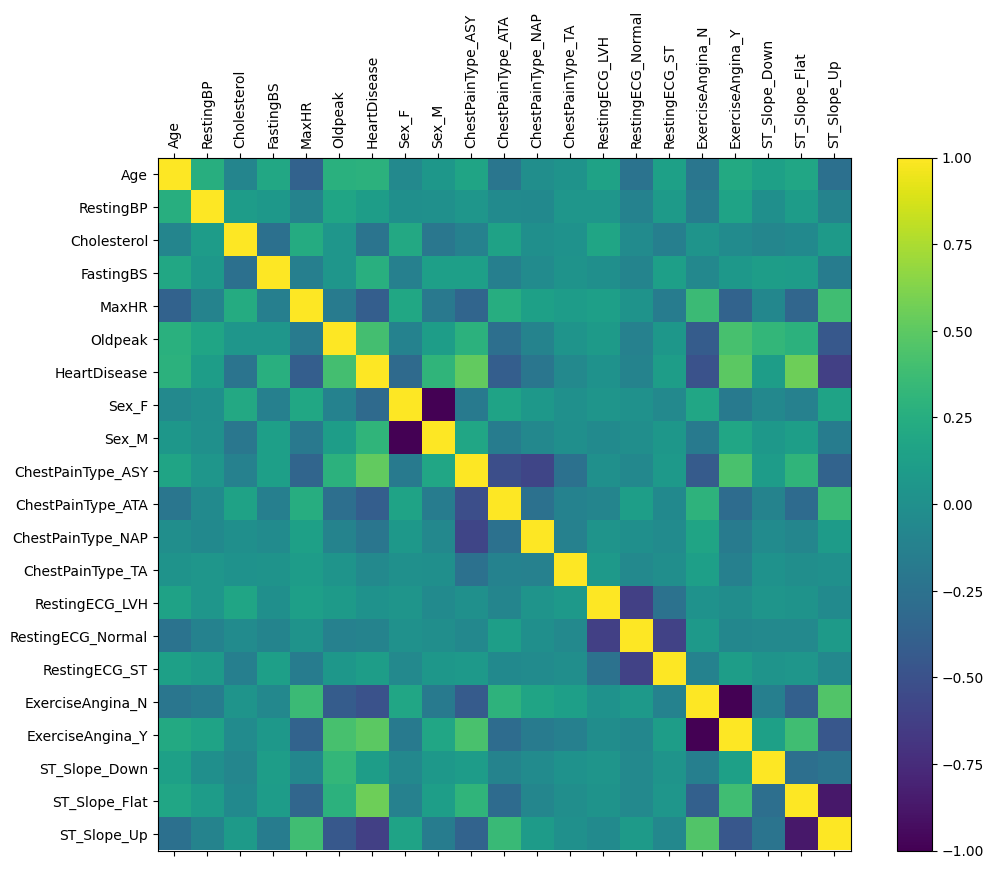

In [101]:
# https://www.linkedin.com/pulse/detailed-preprocessing-process-machine-learning-python-leonardo-a

# one-hot encoding for all categorical columns https://www.geeksforgeeks.org/python-pandas-get_dummies-method/
encoded_dataset = pd.get_dummies(dataset)

# compute the correlation matrix
correlations = encoded_dataset.corr()

import matplotlib.pyplot as plt 
# plot matrix as a heatmap
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

# Set label
plt.xticks(range(len(correlations.columns)), correlations.columns, rotation=90)
plt.yticks(range(len(correlations.columns)), correlations.columns)

plt.show()

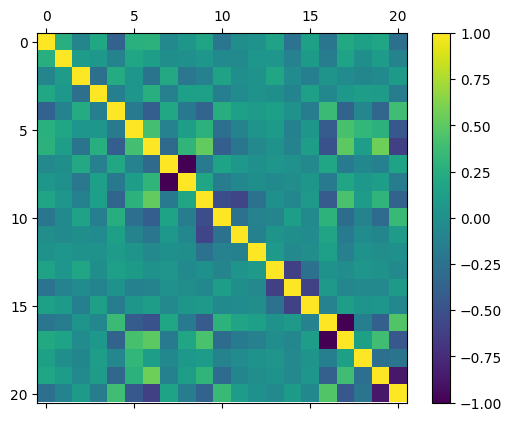

In [102]:
# without establishing label
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
plt.show()

# Data Visualization with Histogram

In [105]:
# https://www.linkedin.com/pulse/detailed-preprocessing-process-machine-learning-python-leonardo-a
# generate charts
%matplotlib inline

# this dataset contains both numerical and categorical features, a scatter plot may not be the most suitable visualization, histogram is the better way

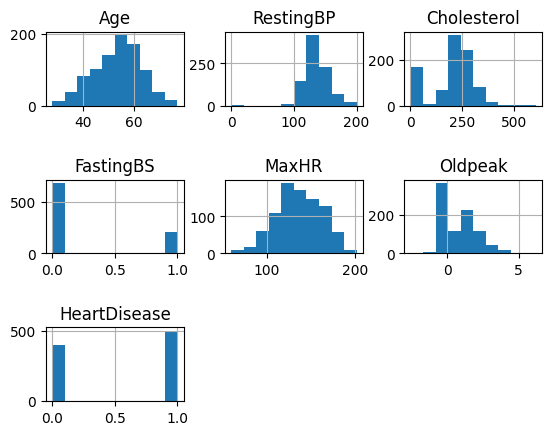

In [106]:
# show histogram of each column
dataset.hist()
plt.subplots_adjust(hspace=1.0) #dont let diagrams cross over
plt.show()

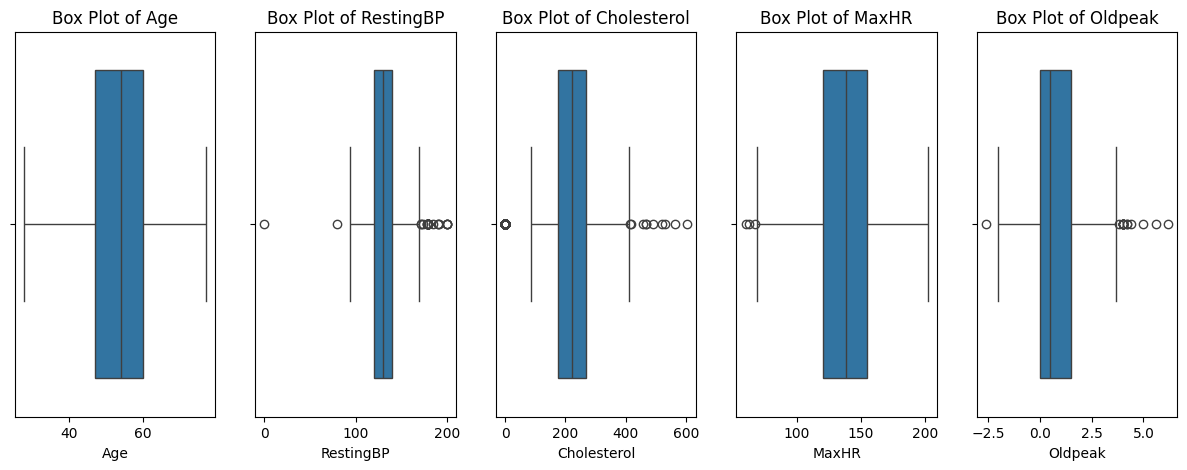

In [108]:
import seaborn as sns

# choose the numerical columns
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15, 5))
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=column, data=dataset, ax=axes[i])

# titles
for i, column in enumerate(numerical_columns):
    axes[i].set_title(f'Box Plot of {column}')

plt.show()